# Analysis of road accidents in Belgium 2005-2018  #

## Data source

-https://statbel.fgov.be/en/open-data.<br> -License: 'Licentie open data' which is compatible with the Creative Commons Attribution 2.0 license https://creativecommons.org/licenses/by/2.0

## Objectives 

-look for patterns with deadly accidents<br>
-where and why do most deadly accidents occur<br>
-create model to make predictions<br>



## 1. Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import os, re, sys
import time

## 2. Load/reshape/remove data

In [2]:
os.getcwd()

'D:\\GitHub\\Road_accidents_Belgium'

In [3]:
os.chdir('D:\\GitHub\\Road_accidents_Belgium\\Accidents')

In [4]:
path = os.getcwd()
files = os.listdir(path)

### 2.1 Make one dataframe out of all the _year .xlsx files

In [5]:
files_xls = [f for f in files if f[-4:] == 'xlsx']

In [6]:
print(files_xls)

['TF_ACCIDENTS_2005.xlsx', 'TF_ACCIDENTS_2006.xlsx', 'TF_ACCIDENTS_2007.xlsx', 'TF_ACCIDENTS_2008.xlsx', 'TF_ACCIDENTS_2009.xlsx', 'TF_ACCIDENTS_2010.xlsx', 'TF_ACCIDENTS_2011.xlsx', 'TF_ACCIDENTS_2012.xlsx', 'TF_ACCIDENTS_2013.xlsx', 'TF_ACCIDENTS_2014.xlsx', 'TF_ACCIDENTS_2015.xlsx', 'TF_ACCIDENTS_2016.xlsx', 'TF_ACCIDENTS_2017.xlsx', 'TF_ACCIDENTS_2018.xlsx']


In [7]:
df_accidents = pd.DataFrame()

In [8]:
#Loop over list of files to append to empty dataframe:
start = time.time()

for f in files_xls:
    data = pd.read_excel(f)
    df_accidents = df_accidents.append(data)
    
end = time.time()
print(end - start)

338.46013021469116


In [9]:
df_accidents.columns

Index(['DT_DAY', 'DT_HOUR', 'CD_DAY_OF_WEEK', 'TX_DAY_OF_WEEK_DESCR_FR',
       'TX_DAY_OF_WEEK_DESCR_NL', 'CD_BUILD_UP_AREA',
       'TX_BUILD_UP_AREA_DESCR_NL', 'TX_BUILD_UP_AREA_DESCR_FR',
       'CD_COLL_TYPE', 'TX_COLL_TYPE_DESCR_NL', 'TX_COLL_TYPE_DESCR_FR',
       'CD_LIGHT_COND', 'TX_LIGHT_COND_DESCR_NL', 'TX_LIGHT_COND_DESCR_FR',
       'CD_ROAD_TYPE', 'TX_ROAD_TYPE_DESCR_NL', 'TX_ROAD_TYPE_DESCR_FR',
       'CD_MUNTY_REFNIS', 'TX_MUNTY_DESCR_NL', 'TX_MUNTY_DESCR_FR',
       'CD_DSTR_REFNIS', 'TX_ADM_DSTR_DESCR_NL', 'TX_ADM_DSTR_DESCR_FR',
       'CD_PROV_REFNIS', 'TX_PROV_DESCR_NL', 'TX_PROV_DESCR_FR',
       'CD_RGN_REFNIS', 'TX_RGN_DESCR_NL', 'TX_RGN_DESCR_FR', 'MS_ACCT',
       'MS_ACCT_WITH_DEAD', 'MS_ACCT_WITH_DEAD_30_DAYS',
       'MS_ACCT_WITH_MORY_INJ', 'MS_ACCT_WITH_SERLY_INJ',
       'MS_ACCT_WITH_SLY_INJ'],
      dtype='object')

### 2.2 Focus on deadly accidents, remove other outcomes

In [10]:
df_accidents = df_accidents.drop(['MS_ACCT_WITH_MORY_INJ',
       'MS_ACCT_WITH_SERLY_INJ', 'MS_ACCT_WITH_SLY_INJ','MS_ACCT'],axis=1)

### 2.3 Remove french descriptions (FR columns)

In [11]:
cols = [c for c in df_accidents.columns if not c.endswith('FR')]
cols
df_accidents=df_accidents[cols]

In [12]:
df_accidents.columns

Index(['DT_DAY', 'DT_HOUR', 'CD_DAY_OF_WEEK', 'TX_DAY_OF_WEEK_DESCR_NL',
       'CD_BUILD_UP_AREA', 'TX_BUILD_UP_AREA_DESCR_NL', 'CD_COLL_TYPE',
       'TX_COLL_TYPE_DESCR_NL', 'CD_LIGHT_COND', 'TX_LIGHT_COND_DESCR_NL',
       'CD_ROAD_TYPE', 'TX_ROAD_TYPE_DESCR_NL', 'CD_MUNTY_REFNIS',
       'TX_MUNTY_DESCR_NL', 'CD_DSTR_REFNIS', 'TX_ADM_DSTR_DESCR_NL',
       'CD_PROV_REFNIS', 'TX_PROV_DESCR_NL', 'CD_RGN_REFNIS',
       'TX_RGN_DESCR_NL', 'MS_ACCT_WITH_DEAD', 'MS_ACCT_WITH_DEAD_30_DAYS'],
      dtype='object')

In [13]:
df_accidents.shape

(617972, 22)

In [14]:
df_accidents.head(2)

,DT_DAY,DT_HOUR,CD_DAY_OF_WEEK,TX_DAY_OF_WEEK_DESCR_NL,CD_BUILD_UP_AREA,TX_BUILD_UP_AREA_DESCR_NL,CD_COLL_TYPE,TX_COLL_TYPE_DESCR_NL,CD_LIGHT_COND,TX_LIGHT_COND_DESCR_NL,...,CD_MUNTY_REFNIS,TX_MUNTY_DESCR_NL,CD_DSTR_REFNIS,TX_ADM_DSTR_DESCR_NL,CD_PROV_REFNIS,TX_PROV_DESCR_NL,CD_RGN_REFNIS,TX_RGN_DESCR_NL,MS_ACCT_WITH_DEAD,MS_ACCT_WITH_DEAD_30_DAYS
0,2005-01-04,10,2,dinsdag,2.0,Buiten bebouwde kom,4.0,Langs opzij,1.0,Bij klaarlichte dag,...,11001,Aartselaar,11000,Arrondissement Antwerpen,10000.0,Provincie Antwerpen,2000,Vlaams Gewest,0,0
1,2005-01-05,16,3,woensdag,1.0,Binnen bebouwde kom,4.0,Langs opzij,1.0,Bij klaarlichte dag,...,11001,Aartselaar,11000,Arrondissement Antwerpen,10000.0,Provincie Antwerpen,2000,Vlaams Gewest,0,0


### 2.4 Convert to pd datetime and create new date/time columns

In [15]:
df_accidents['date'] = pd.to_datetime(df_accidents['DT_DAY'])
df_accidents = df_accidents.drop('DT_DAY',axis=1)

In [16]:
df_accidents['month'] = df_accidents['date'].apply(lambda date: date.month)
df_accidents['year'] = df_accidents['date'].apply(lambda date: date.year)
df_accidents['quarter'] = df_accidents['date'].apply(lambda date: date.quarter)

In [17]:
df_accidents.columns

Index(['DT_HOUR', 'CD_DAY_OF_WEEK', 'TX_DAY_OF_WEEK_DESCR_NL',
       'CD_BUILD_UP_AREA', 'TX_BUILD_UP_AREA_DESCR_NL', 'CD_COLL_TYPE',
       'TX_COLL_TYPE_DESCR_NL', 'CD_LIGHT_COND', 'TX_LIGHT_COND_DESCR_NL',
       'CD_ROAD_TYPE', 'TX_ROAD_TYPE_DESCR_NL', 'CD_MUNTY_REFNIS',
       'TX_MUNTY_DESCR_NL', 'CD_DSTR_REFNIS', 'TX_ADM_DSTR_DESCR_NL',
       'CD_PROV_REFNIS', 'TX_PROV_DESCR_NL', 'CD_RGN_REFNIS',
       'TX_RGN_DESCR_NL', 'MS_ACCT_WITH_DEAD', 'MS_ACCT_WITH_DEAD_30_DAYS',
       'date', 'month', 'year', 'quarter'],
      dtype='object')

### 2.5 change column names 'DT_HOUR', 'CD_DAY_OF_WEEK' to 'hour', 'dow'

In [18]:
df_accidents.columns = ['hour', 'dow', 'TX_DAY_OF_WEEK_DESCR_NL',
       'CD_BUILD_UP_AREA', 'TX_BUILD_UP_AREA_DESCR_NL', 'CD_COLL_TYPE',
       'TX_COLL_TYPE_DESCR_NL', 'CD_LIGHT_COND', 'TX_LIGHT_COND_DESCR_NL',
       'CD_ROAD_TYPE', 'TX_ROAD_TYPE_DESCR_NL', 'CD_MUNTY_REFNIS',
       'TX_MUNTY_DESCR_NL', 'CD_DSTR_REFNIS', 'TX_ADM_DSTR_DESCR_NL',
       'CD_PROV_REFNIS', 'TX_PROV_DESCR_NL', 'CD_RGN_REFNIS',
       'TX_RGN_DESCR_NL', 'MS_ACCT_WITH_DEAD',
       'MS_ACCT_WITH_DEAD_30_DAYS', 'date', 'month',
       'year', 'quarter']

In [19]:
df_accidents.columns

Index(['hour', 'dow', 'TX_DAY_OF_WEEK_DESCR_NL', 'CD_BUILD_UP_AREA',
       'TX_BUILD_UP_AREA_DESCR_NL', 'CD_COLL_TYPE', 'TX_COLL_TYPE_DESCR_NL',
       'CD_LIGHT_COND', 'TX_LIGHT_COND_DESCR_NL', 'CD_ROAD_TYPE',
       'TX_ROAD_TYPE_DESCR_NL', 'CD_MUNTY_REFNIS', 'TX_MUNTY_DESCR_NL',
       'CD_DSTR_REFNIS', 'TX_ADM_DSTR_DESCR_NL', 'CD_PROV_REFNIS',
       'TX_PROV_DESCR_NL', 'CD_RGN_REFNIS', 'TX_RGN_DESCR_NL',
       'MS_ACCT_WITH_DEAD', 'MS_ACCT_WITH_DEAD_30_DAYS', 'date', 'month',
       'year', 'quarter'],
      dtype='object')

### 2.6 Remove duplicate columns (data available in both text and numerical form)

In [20]:
df_accidents.head(4)

,hour,dow,TX_DAY_OF_WEEK_DESCR_NL,CD_BUILD_UP_AREA,TX_BUILD_UP_AREA_DESCR_NL,CD_COLL_TYPE,TX_COLL_TYPE_DESCR_NL,CD_LIGHT_COND,TX_LIGHT_COND_DESCR_NL,CD_ROAD_TYPE,...,CD_PROV_REFNIS,TX_PROV_DESCR_NL,CD_RGN_REFNIS,TX_RGN_DESCR_NL,MS_ACCT_WITH_DEAD,MS_ACCT_WITH_DEAD_30_DAYS,date,month,year,quarter
0,10,2,dinsdag,2.0,Buiten bebouwde kom,4.0,Langs opzij,1.0,Bij klaarlichte dag,2.0,...,10000.0,Provincie Antwerpen,2000,Vlaams Gewest,0,0,2005-01-04,1,2005,1
1,16,3,woensdag,1.0,Binnen bebouwde kom,4.0,Langs opzij,1.0,Bij klaarlichte dag,2.0,...,10000.0,Provincie Antwerpen,2000,Vlaams Gewest,0,0,2005-01-05,1,2005,1
2,16,2,dinsdag,1.0,Binnen bebouwde kom,4.0,Langs opzij,1.0,Bij klaarlichte dag,2.0,...,10000.0,Provincie Antwerpen,2000,Vlaams Gewest,0,0,2005-01-11,1,2005,1
3,24,2,dinsdag,1.0,Binnen bebouwde kom,7.0,Tegen een hindernis buiten de rijbaan,3.0,"Nacht, ontstoken openbare verlichting",2.0,...,10000.0,Provincie Antwerpen,2000,Vlaams Gewest,0,0,2005-01-04,1,2005,1


In [21]:
df_accidents = df_accidents.drop(['TX_DAY_OF_WEEK_DESCR_NL','date'],axis=1)

In [22]:
os.getcwd()

'D:\\GitHub\\Road_accidents_Belgium\\Accidents'

In [23]:
df_accidents['TX_BUILD_UP_AREA_DESCR_NL'].value_counts()

Binnen bebouwde kom    308553
Buiten bebouwde kom    234484
Niet beschikbaar        74935
Name: TX_BUILD_UP_AREA_DESCR_NL, dtype: int64

In [24]:
df_accidents['CD_BUILD_UP_AREA'].value_counts()

1.0    308553
2.0    234484
Name: CD_BUILD_UP_AREA, dtype: int64

In [25]:
#where did "not available" (Niet beschikbaar) go for the numerical version?

In [26]:
df_accidents['CD_BUILD_UP_AREA'].isnull().sum()

74935

In [27]:
#replace nan's with 3.0
df_accidents["CD_BUILD_UP_AREA"].fillna(3.0, inplace = True) 

In [28]:
df_accidents['CD_BUILD_UP_AREA'].value_counts()

#1.0 = Binnen bebouwde kom (in residential area)
#2.0 = Buiten bebouwde kom (outside built-up areas)
#3.0 = Niet beschikbaar (not available)


1.0    308553
2.0    234484
3.0     74935
Name: CD_BUILD_UP_AREA, dtype: int64

In [29]:
#remove text column 
df_accidents = df_accidents.drop('TX_BUILD_UP_AREA_DESCR_NL',axis=1)

In [30]:
df_accidents.head(4)

,hour,dow,CD_BUILD_UP_AREA,CD_COLL_TYPE,TX_COLL_TYPE_DESCR_NL,CD_LIGHT_COND,TX_LIGHT_COND_DESCR_NL,CD_ROAD_TYPE,TX_ROAD_TYPE_DESCR_NL,CD_MUNTY_REFNIS,...,TX_ADM_DSTR_DESCR_NL,CD_PROV_REFNIS,TX_PROV_DESCR_NL,CD_RGN_REFNIS,TX_RGN_DESCR_NL,MS_ACCT_WITH_DEAD,MS_ACCT_WITH_DEAD_30_DAYS,month,year,quarter
0,10,2,2.0,4.0,Langs opzij,1.0,Bij klaarlichte dag,2.0,"Gewestweg, provincieweg of gemeenteweg",11001,...,Arrondissement Antwerpen,10000.0,Provincie Antwerpen,2000,Vlaams Gewest,0,0,1,2005,1
1,16,3,1.0,4.0,Langs opzij,1.0,Bij klaarlichte dag,2.0,"Gewestweg, provincieweg of gemeenteweg",11001,...,Arrondissement Antwerpen,10000.0,Provincie Antwerpen,2000,Vlaams Gewest,0,0,1,2005,1
2,16,2,1.0,4.0,Langs opzij,1.0,Bij klaarlichte dag,2.0,"Gewestweg, provincieweg of gemeenteweg",11001,...,Arrondissement Antwerpen,10000.0,Provincie Antwerpen,2000,Vlaams Gewest,0,0,1,2005,1
3,24,2,1.0,7.0,Tegen een hindernis buiten de rijbaan,3.0,"Nacht, ontstoken openbare verlichting",2.0,"Gewestweg, provincieweg of gemeenteweg",11001,...,Arrondissement Antwerpen,10000.0,Provincie Antwerpen,2000,Vlaams Gewest,0,0,1,2005,1


In [31]:
df_accidents['CD_COLL_TYPE'].value_counts()

4.0    183703
3.0    107443
7.0     85647
2.0     58302
5.0     53409
8.0     32920
6.0     14049
1.0      5637
Name: CD_COLL_TYPE, dtype: int64

In [32]:
df_accidents['TX_COLL_TYPE_DESCR_NL'].value_counts()

Langs opzij                               183703
Langs achteren (of naast elkaar)          107443
Tegen een hindernis buiten de rijbaan      85647
Niet beschikbaar                           76862
Frontale botsing (of bij het kruisen)      58302
Met een voetganger                         53409
Eén bestuurder, geen hindernis             32920
Tegen een hindernis op de rijbaan          14049
Kettingbotsing (4 bestuurders of meer)      5637
Name: TX_COLL_TYPE_DESCR_NL, dtype: int64

In [33]:
# 1.0 = Kettingbotsing (4 bestuurders of meer)      5637
# 2.0 = Frontale botsing (of bij het kruisen)      58302
# 3.0 = Langs achteren (of naast elkaar)          107443
# 4.0 = Langs opzij                               183703
# 5.0 = Met een voetganger                         53409
# 6.0 = Tegen een hindernis op de rijbaan          14049
# 7.0 = Tegen een hindernis buiten de rijbaan      85647

In [34]:
#remove text column 
df_accidents = df_accidents.drop('TX_COLL_TYPE_DESCR_NL',axis=1)

In [35]:
df_accidents.head(4)

,hour,dow,CD_BUILD_UP_AREA,CD_COLL_TYPE,CD_LIGHT_COND,TX_LIGHT_COND_DESCR_NL,CD_ROAD_TYPE,TX_ROAD_TYPE_DESCR_NL,CD_MUNTY_REFNIS,TX_MUNTY_DESCR_NL,...,TX_ADM_DSTR_DESCR_NL,CD_PROV_REFNIS,TX_PROV_DESCR_NL,CD_RGN_REFNIS,TX_RGN_DESCR_NL,MS_ACCT_WITH_DEAD,MS_ACCT_WITH_DEAD_30_DAYS,month,year,quarter
0,10,2,2.0,4.0,1.0,Bij klaarlichte dag,2.0,"Gewestweg, provincieweg of gemeenteweg",11001,Aartselaar,...,Arrondissement Antwerpen,10000.0,Provincie Antwerpen,2000,Vlaams Gewest,0,0,1,2005,1
1,16,3,1.0,4.0,1.0,Bij klaarlichte dag,2.0,"Gewestweg, provincieweg of gemeenteweg",11001,Aartselaar,...,Arrondissement Antwerpen,10000.0,Provincie Antwerpen,2000,Vlaams Gewest,0,0,1,2005,1
2,16,2,1.0,4.0,1.0,Bij klaarlichte dag,2.0,"Gewestweg, provincieweg of gemeenteweg",11001,Aartselaar,...,Arrondissement Antwerpen,10000.0,Provincie Antwerpen,2000,Vlaams Gewest,0,0,1,2005,1
3,24,2,1.0,7.0,3.0,"Nacht, ontstoken openbare verlichting",2.0,"Gewestweg, provincieweg of gemeenteweg",11001,Aartselaar,...,Arrondissement Antwerpen,10000.0,Provincie Antwerpen,2000,Vlaams Gewest,0,0,1,2005,1


In [36]:
df_accidents['TX_LIGHT_COND_DESCR_NL'].value_counts()

Bij klaarlichte dag                      398885
Nacht, ontstoken openbare verlichting    126694
Niet beschikbaar                          48992
Dageraad - schemering                     27415
Nacht, geen openbare verlichting          15986
Name: TX_LIGHT_COND_DESCR_NL, dtype: int64

In [37]:
df_accidents['CD_LIGHT_COND'].value_counts()

1.0    398885
3.0    126694
2.0     27415
4.0     15986
Name: CD_LIGHT_COND, dtype: int64

In [38]:
#5.0 is missing "not available" (Niet beschikbaar) 

In [39]:
#replace nan's with 5.0
df_accidents['CD_LIGHT_COND'].fillna(5.0, inplace = True) 

In [40]:
df_accidents['CD_LIGHT_COND'].value_counts()

1.0    398885
3.0    126694
5.0     48992
2.0     27415
4.0     15986
Name: CD_LIGHT_COND, dtype: int64

In [41]:
# Bij klaarlichte dag                      398885
# Nacht, ontstoken openbare verlichting    126694
# Niet beschikbaar                          48992
# Dageraad - schemering                     27415
# Nacht, geen openbare verlichting          15986

# 1.0    398885
# 3.0    126694
# 5.0     48992
# 2.0     27415
# 4.0     15986

In [42]:
#remove text column 
df_accidents = df_accidents.drop('TX_LIGHT_COND_DESCR_NL',axis=1)

In [43]:
df_accidents.head(2)

,hour,dow,CD_BUILD_UP_AREA,CD_COLL_TYPE,CD_LIGHT_COND,CD_ROAD_TYPE,TX_ROAD_TYPE_DESCR_NL,CD_MUNTY_REFNIS,TX_MUNTY_DESCR_NL,CD_DSTR_REFNIS,TX_ADM_DSTR_DESCR_NL,CD_PROV_REFNIS,TX_PROV_DESCR_NL,CD_RGN_REFNIS,TX_RGN_DESCR_NL,MS_ACCT_WITH_DEAD,MS_ACCT_WITH_DEAD_30_DAYS,month,year,quarter
0,10,2,2.0,4.0,1.0,2.0,"Gewestweg, provincieweg of gemeenteweg",11001,Aartselaar,11000,Arrondissement Antwerpen,10000.0,Provincie Antwerpen,2000,Vlaams Gewest,0,0,1,2005,1
1,16,3,1.0,4.0,1.0,2.0,"Gewestweg, provincieweg of gemeenteweg",11001,Aartselaar,11000,Arrondissement Antwerpen,10000.0,Provincie Antwerpen,2000,Vlaams Gewest,0,0,1,2005,1


In [44]:
df_accidents['TX_ROAD_TYPE_DESCR_NL'].value_counts()

Gewestweg, provincieweg of gemeenteweg    562714
Autosnelweg                                49269
Onbekend                                    5989
Name: TX_ROAD_TYPE_DESCR_NL, dtype: int64

In [45]:
df_accidents['CD_ROAD_TYPE'].value_counts()

2.0    562714
1.0     49269
Name: CD_ROAD_TYPE, dtype: int64

In [46]:
#3.0 is missing "unknown" (Onbekend) 

In [47]:
#replace nan's with 3.0
df_accidents['CD_ROAD_TYPE'].fillna(3.0, inplace = True) 

In [48]:
df_accidents['CD_ROAD_TYPE'].value_counts()

2.0    562714
1.0     49269
3.0      5989
Name: CD_ROAD_TYPE, dtype: int64

In [49]:
# Gewestweg, provincieweg of gemeenteweg    562714
# Autosnelweg                                49269
# Onbekend                                    5989

# 2.0    562714
# 1.0     49269
# 3.0      5989

In [50]:
#remove text column 
df_accidents = df_accidents.drop('TX_ROAD_TYPE_DESCR_NL',axis=1)

In [51]:
df_accidents.head(2)

,hour,dow,CD_BUILD_UP_AREA,CD_COLL_TYPE,CD_LIGHT_COND,CD_ROAD_TYPE,CD_MUNTY_REFNIS,TX_MUNTY_DESCR_NL,CD_DSTR_REFNIS,TX_ADM_DSTR_DESCR_NL,CD_PROV_REFNIS,TX_PROV_DESCR_NL,CD_RGN_REFNIS,TX_RGN_DESCR_NL,MS_ACCT_WITH_DEAD,MS_ACCT_WITH_DEAD_30_DAYS,month,year,quarter
0,10,2,2.0,4.0,1.0,2.0,11001,Aartselaar,11000,Arrondissement Antwerpen,10000.0,Provincie Antwerpen,2000,Vlaams Gewest,0,0,1,2005,1
1,16,3,1.0,4.0,1.0,2.0,11001,Aartselaar,11000,Arrondissement Antwerpen,10000.0,Provincie Antwerpen,2000,Vlaams Gewest,0,0,1,2005,1


## 3. Exploratory data analysis

In [52]:
os.chdir('D:\\GitHub\\Road_accidents_Belgium\\Plots\\')

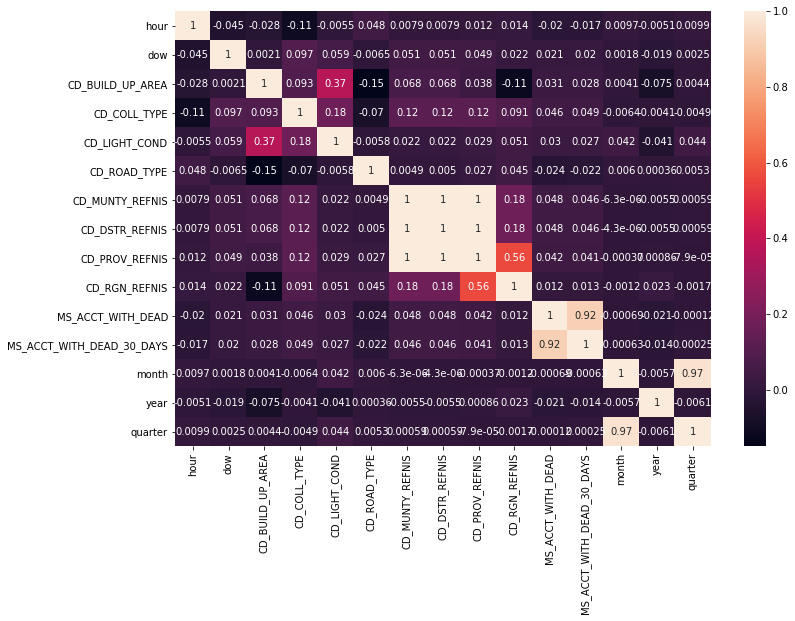

In [53]:
plt.figure(figsize=(12,8))
cm = df_accidents.corr()
sns.heatmap(cm,annot=True)

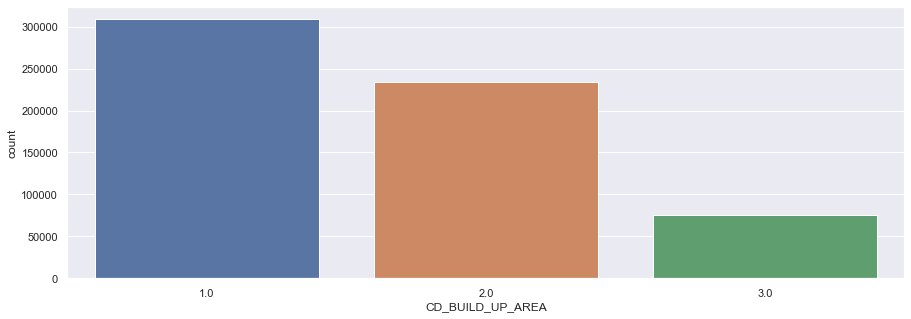

In [54]:
sns.set(rc={'figure.figsize':(15,5)})
ax = sns.countplot(df_accidents['CD_BUILD_UP_AREA'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
fig = ax.get_figure()
fig.savefig('area.png', dpi=300)

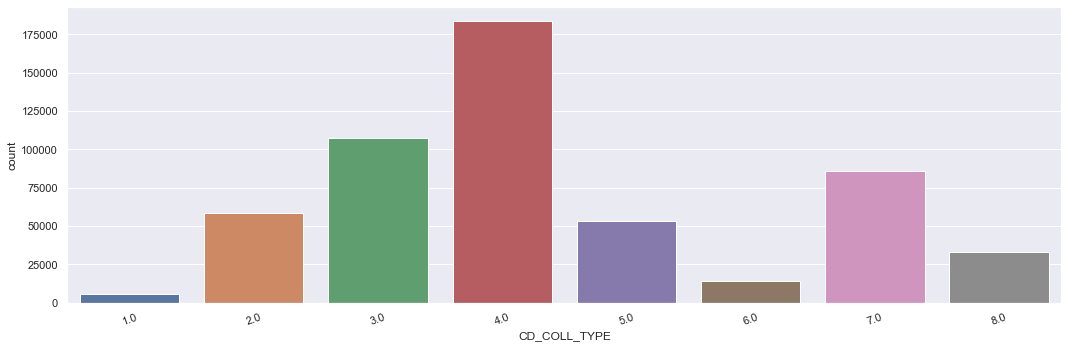

In [55]:
sns.set(rc={'figure.figsize':(15,5)})
ax = sns.countplot(df_accidents['CD_COLL_TYPE'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=20)
plt.tight_layout()
fig = ax.get_figure()
fig.savefig('collision_type.png', dpi=300)

In [56]:
#Keep in mind, takes very long to create jointplot below, therefor commented out
# sns.set(rc={'figure.figsize':(15,5)})
# ax = sns.jointplot(x='dow', y='hour',data=df_accidents,kind="kde")
# #ax.savefig('joint_plot_dayow_hr.png', dpi=300)

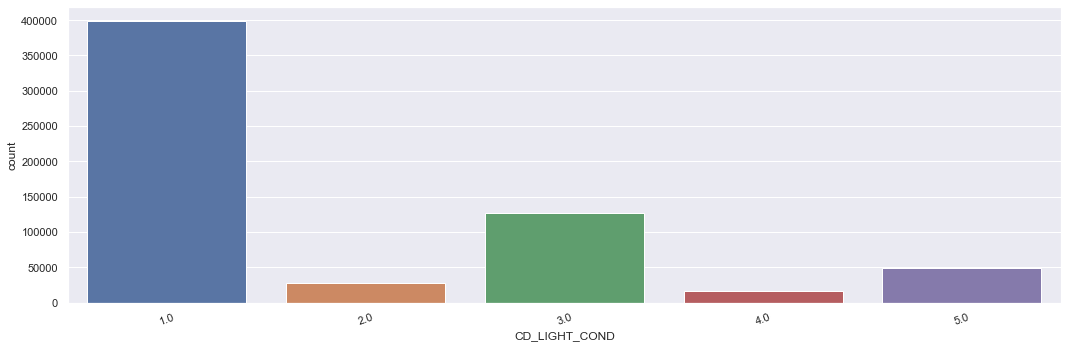

In [57]:
sns.set(rc={'figure.figsize':(15,5)})
ax = sns.countplot(df_accidents['CD_LIGHT_COND'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=20)
plt.tight_layout()
fig = ax.get_figure()
fig.savefig('light_condition.png', dpi=300)

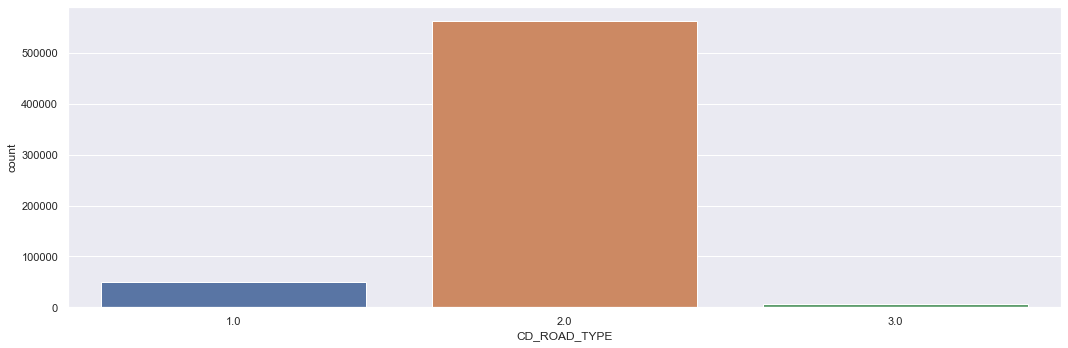

In [58]:
sns.set(rc={'figure.figsize':(15,5)})
ax = sns.countplot(df_accidents['CD_ROAD_TYPE'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.tight_layout()
fig = ax.get_figure()
fig.savefig('road_type.png', dpi=300)

In [59]:
os.chdir('D:\\GitHub\\Road_accidents_Belgium\\Accidents')

In [60]:
df_accidents['CD_MUNTY_REFNIS'].value_counts().head(5)

11002    34495
44021    23007
21004    16791
62063    12177
52011    10996
Name: CD_MUNTY_REFNIS, dtype: int64

In [61]:
df_accidents['TX_MUNTY_DESCR_NL'].value_counts().head(5)

Antwerpen    34495
Gent         23007
Brussel      16791
Luik         12177
Charleroi    10996
Name: TX_MUNTY_DESCR_NL, dtype: int64

### 3.1 Explore REFNIS

https://en.wikipedia.org/wiki/Provinces_of_Belgium
The country of Belgium is divided into three regions. Two of these regions, the Flemish Region or Flanders, and Walloon Region, or Wallonia, are each subdivided into five provinces. The third region, the Brussels-Capital Region, is not divided into provinces, as it was originally only a small part of a province itself. 

https://nl.wikipedia.org/wiki/NIS-code
The NIS code (Dutch: NIS-code, French: code INS) is an alphanumeric code for regional areas of Belgium.
This code is used for statistical data treatment in Belgium. This code was developed mid-1960s by the Statistics Belgium. It was first used for the census of 1970. 


https://statbel.fgov.be/nl/open-data/refnis-code
Belgium is classified according to a hierarchical system that the French introduced in 1796. The administrative division is based on four territorial units: regions, provinces, administrative districts and municipalities. The municipalities are the basic units, which means that each higher level territorial unit consists of different municipalities.

   Level 1: 3 regions
    Level 2: 10 provinces
    Level 3: 43 administrative districts
    Level 4: 581 municipalities (589 to 31/12/2018) --- sanity check: length of CD_MUNTY_REFNIS also 589
    Level 5: Boroughs
    Level 7: Statistical sectors

https://nl.wikipedia.org/wiki/Arrondissement
A district is part of the territory of the state, which is divided up for administrative or administrative reasons. Each district is an area of responsibility of colleges and civil servants (working for a government). It is originally from French and literally means completion.

https://nl.wikipedia.org/wiki/Deelgemeente_(Belgi%C3%AB)
A sub-municipality in Belgium is the territory of the former municipalities that were still independent before the major municipal redivisions in the 1960s-70s

Source REFNIS file: https://statbel.fgov.be/nl/over-statbel/methodologie/classificaties/geografie

In [62]:
os.chdir('D:\\GitHub\\Road_accidents_Belgium\\Geoplot')

In [63]:
os.getcwd()

'D:\\GitHub\\Road_accidents_Belgium\\Geoplot'

In [64]:
df_refnis = pd.read_excel('refnis.xlsx')

In [65]:
#drop french columns
df_refnis = df_refnis.drop(['Code INS','Entités administratives','Langue'], axis=1)

### 3.2 Geographical plots

Geopandas:
https://towardsdatascience.com/lets-make-a-map-using-geopandas-pandas-and-matplotlib-to-make-a-chloropleth-map-dddc31c1983d

Sources:

1) http://www.geopunt.be/download?container=referentiebestand-gemeenten&title=Voorlopig%20referentiebestand%20gemeentegrenzen# (shapefiles of only Flanders)


2) https://www.geo.be/#!/catalog/details/9738c7c0-5255-11ea-8895-34e12d0f0423?l=nl (postal codes of Belgium)


3) https://www.eea.europa.eu/data-and-maps/data/eea-reference-grids-2/gis-files/belgium-shapefile

4) https://hub.arcgis.com/datasets/esribeluxdata::belgium-municipalities




In [66]:
import geopandas as gpd

### 3.2.1 Explore source 1

In [67]:
# set the filepath and load in a shapefile
#gewesten
gew = "D:\\GitHub\\Road_accidents_Belgium\\Geoplot\\Shapefiles\\GewVLA_Shape\\Shapefile\\Refgew.shp"
#provincies
prv = "D:\\GitHub\\Road_accidents_Belgium\\Geoplot\\Shapefiles\\GewVLA_Shape\\Shapefile\\Refprv.shp"
#gemeentes
gem = "D:\\GitHub\\Road_accidents_Belgium\\Geoplot\\Shapefiles\\GewVLA_Shape\\Shapefile\\Refgem.shp"
#rarrondisementen
arr = "D:\\GitHub\\Road_accidents_Belgium\\Geoplot\\Shapefiles\\GewVLA_Shape\\Shapefile\\Refarr.shp"

In [68]:
map_gew = gpd.read_file(gew)
map_prv = gpd.read_file(prv)
map_gem = gpd.read_file(gem)
map_arr = gpd.read_file(arr)

In [69]:
# check data type so we can see that this is not a normal dataframe, but a GEOdataframe
# had to install descartes in anaconda environment to make this work
map_gew.head() 

,OIDN,UIDN,VERSDATUM,TERRID,NAAM,NISCODE,NUTS1,LENGTE,OPPERVL,geometry
0,1.0,5.0,1900-01-01,363,Vlaams Gewest,02000,BE2,1.117979e+06,1.362443e+10,"MULTIPOLYGON (((249282.040 164471.980, 249391...."


In [70]:
map_prv.head(5) 

,OIDN,UIDN,VERSDATUM,TERRID,NAAM,NISCODE,NUTS2,LENGTE,OPPERVL,geometry
0,3.0,14.0,1900-01-01,351,West-Vlaanderen,30000,BE25,357355.234143,3.195333e+09,"POLYGON ((80190.818 229279.736, 80661.880 2283..."
1,1.0,16.0,1900-01-01,355,Limburg,70000,BE22,398154.712668,2.427390e+09,"MULTIPOLYGON (((249391.320 164162.500, 249441...."
2,5.0,17.0,1900-01-01,356,Oost-Vlaanderen,40000,BE23,404435.267361,3.007239e+09,"POLYGON ((145735.167 220358.330, 146413.212 21..."
3,2.0,12.0,1900-01-01,357,Antwerpen,10000,BE21,408784.745097,2.876065e+09,"MULTIPOLYGON (((189455.470 233440.400, 189492...."
4,4.0,13.0,1900-01-01,359,Vlaams Brabant,20001,BE24,508725.993612,2.118401e+09,"POLYGON ((200484.928 193540.964, 200493.393 19..."


In [71]:
map_gem.head(4) 

,OIDN,UIDN,VERSDATUM,TERRID,NISCODE,NAAM,DATPUBLBS,NUMAC,LENGTE,OPPERVL,geometry
0,278.0,727.0,1900-01-01,1,13001,Arendonk,1976-01-23,1975123003,32356.181109,5.500452e+07,"POLYGON ((203378.850 223128.860, 203380.195 22..."
1,209.0,517.0,1900-01-01,2,13031,Oud-Turnhout,1982-12-29,1982001920,33491.154251,3.917071e+07,"POLYGON ((191896.098 228261.046, 191910.672 22..."
2,67.0,655.0,1900-01-01,3,13025,Mol,1831-02-07,None,78267.605938,1.145177e+08,"POLYGON ((210668.234 217185.608, 210616.966 21..."
3,53.0,648.0,1900-01-01,4,72037,Hamont-Achel,1976-01-23,1975123003,32003.091789,4.373476e+07,"POLYGON ((229442.220 221344.470, 230005.370 22..."


In [72]:
map_arr.head() 

,OIDN,UIDN,VERSDATUM,TERRID,NAAM,NISCODE,NUTS3,LENGTE,OPPERVL,geometry
0,21.0,56.0,1900-01-01,321,Veurne,38000,BE258,106420.535232,2.876914e+08,"POLYGON ((36685.695 206508.313, 36666.656 2064..."
1,18.0,46.0,1900-01-01,322,Oostende,35000,BE255,121744.287143,3.041164e+08,"POLYGON ((62472.289 222032.484, 62446.448 2220..."
2,17.0,53.0,1900-01-01,323,Brugge,31000,BE251,154622.378888,6.728748e+08,"POLYGON ((80190.818 229279.736, 80661.880 2283..."
3,3.0,29.0,1900-01-01,324,Diksmuide,32000,BE252,119231.974793,3.650620e+08,"POLYGON ((49324.797 203062.453, 49393.434 2028..."
4,2.0,54.0,1900-01-01,325,Ieper,33000,BE253,178629.119880,5.537450e+08,"POLYGON ((36143.933 184181.484, 36200.820 1841..."


In [73]:
len(map_gew['NISCODE'])

1

In [74]:
len(map_prv['NISCODE'])

5

In [75]:
len(map_gem['NISCODE']) #300 municipalities in Flanders

300

In [76]:
len(map_arr['NISCODE'])

22

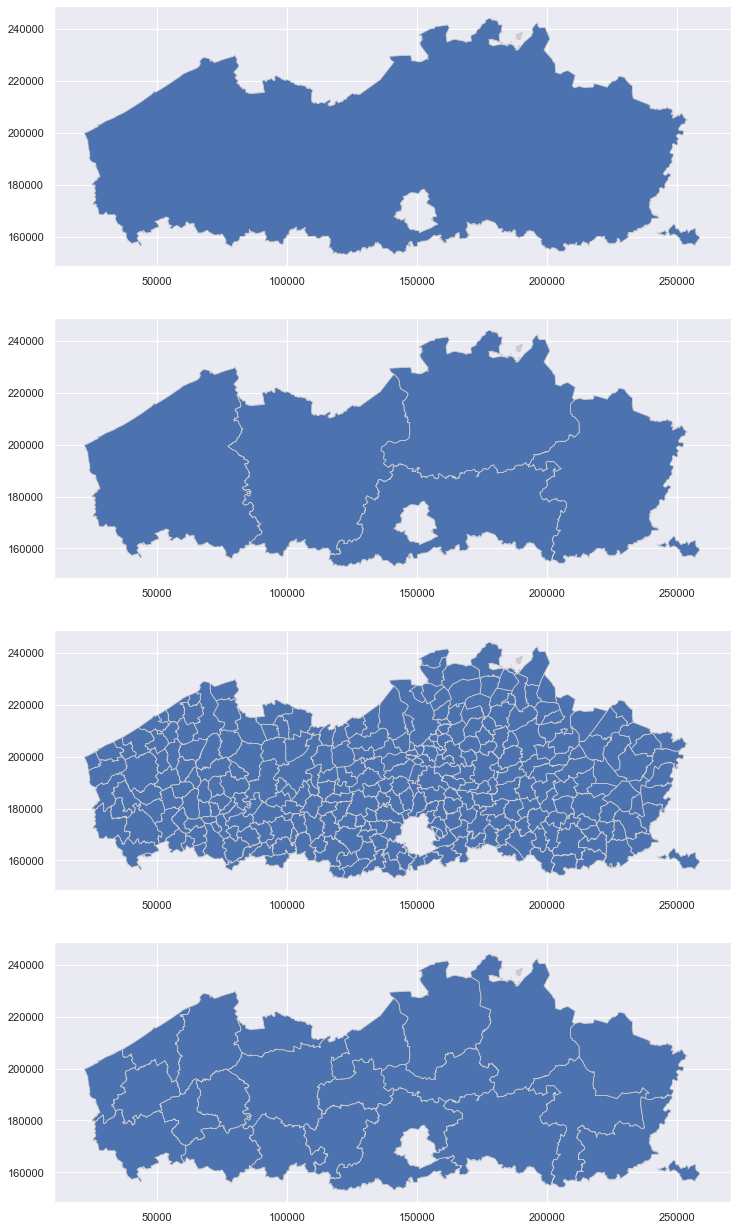

In [77]:
# Create four polar axes and access them through the returned array
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize=(20,22))
ax1 = map_gew.plot(linewidth=0.8, ax=ax1, edgecolor='0.8')
ax2 = map_prv.plot(linewidth=0.8, ax=ax2, edgecolor='0.8')
ax3 = map_gem.plot(linewidth=0.8, ax=ax3, edgecolor='0.8')
ax4 = map_arr.plot(linewidth=0.8, ax=ax4, edgecolor='0.8')

### 3.2.2 Explore source 2

In [78]:
# set the filepath and load in a shapefile
postal_code = "D:\\GitHub\\Road_accidents_Belgium\\Geoplot\\Geodotbe\\3812\\postaldistricts.shp"

In [79]:
map_postal_code = gpd.read_file(postal_code)

In [80]:
map_postal_code.head()

,Join_Count,nouveau_PO,FREQUENCY,CP_speciau,Shape_Leng,Shape_Area,geometry
0,1,5012,2,1,977.714223,3.838034e+04,"POLYGON Z ((685645.150 628039.549 0.000, 68569..."
1,1,5012,2,1,123.021423,8.601421e+02,"POLYGON Z ((685789.894 628275.337 0.000, 68578..."
2,1,5589,1,1,1197.205234,6.306885e+04,"POLYGON Z ((713828.210 594567.550 0.000, 71415..."
3,1094,5560,2,0,54736.127330,5.406061e+07,"POLYGON Z ((691357.659 601352.353 0.000, 69137..."
4,1357,5370,1,0,74754.001683,8.154068e+07,"POLYGON Z ((710598.535 623267.261 0.000, 71118..."


In [81]:
map_postal_code['nouveau_PO'].value_counts()

2387    23
1000     5
4650     4
9400     3
1701     3
        ..
3018     1
7862     1
5504     1
3870     1
2150     1
Name: nouveau_PO, Length: 1187, dtype: int64

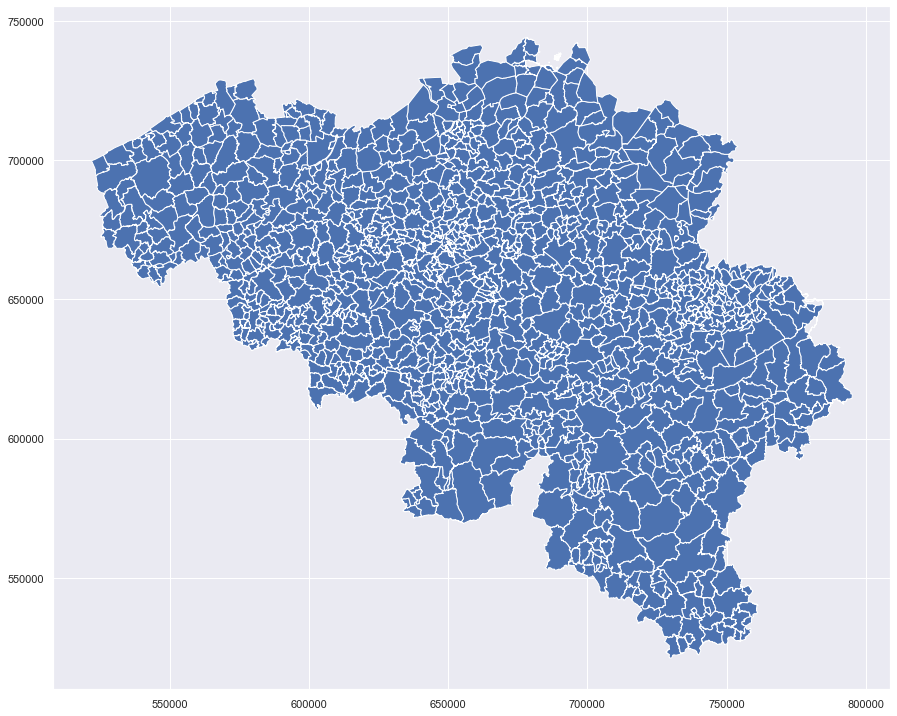

In [82]:
fig, ax = plt.subplots(1, figsize=(15, 15))
map_postal_code.plot(ax=ax)

### 3.2.3 Explore source 3

In [83]:
eea = "D:\\GitHub\\Road_accidents_Belgium\\Geoplot\\Eea\\be_10km.shp"

In [84]:
map_eea = gpd.read_file(eea)

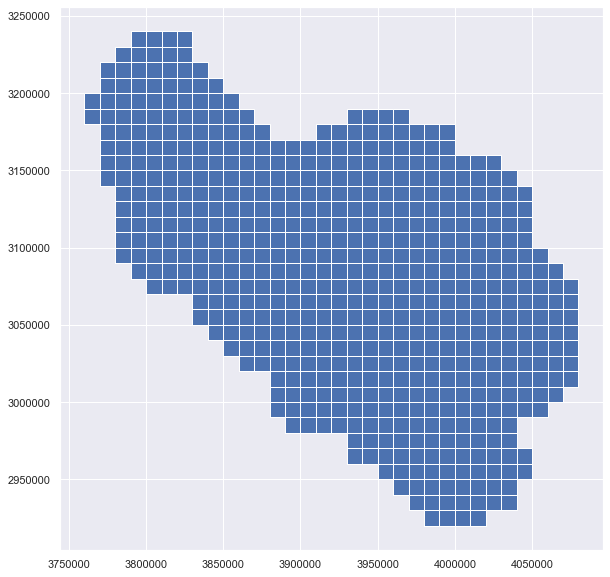

In [85]:
fig, ax = plt.subplots(1, figsize=(10, 10))
map_eea.plot(ax=ax)

### 3.2.4 Explore source 4

In [86]:
arcgis_mun = "D:\\GitHub\\Road_accidents_Belgium\\Geoplot\\Arcgis\\municipalities\\bemun.shp"
arcgis_prov = "D:\\GitHub\\Road_accidents_Belgium\\Geoplot\\Arcgis\\provinces\\provinces.shp"

In [87]:
map_arcgis_mun = gpd.read_file(arcgis_mun)
map_arcgis_prov = gpd.read_file(arcgis_prov)

In [88]:
map_arcgis_mun.head()

,OBJECTID,ADMUNAFR,ADMUNADU,ADMUNAGE,Communes,CODE_INS,arrond,geometry
0,1,AARTSELAAR,AARTSELAAR,AARTSELAAR,Aartselaar,11001,11,"POLYGON ((4.40125 51.14814, 4.40114 51.14797, ..."
1,2,ANVERS,ANTWERPEN,ANTWERPEN,Antwerpen,11002,11,"POLYGON ((4.34109 51.35766, 4.34112 51.35760, ..."
2,3,BOECHOUT,BOECHOUT,BOECHOUT,Boechout,11004,11,"POLYGON ((4.52882 51.19051, 4.52971 51.19020, ..."
3,4,BOOM,BOOM,BOOM,Boom,11005,11,"POLYGON ((4.36411 51.10597, 4.36456 51.10596, ..."
4,5,BORSBEEK,BORSBEEK,BORSBEEK,Borsbeek,11007,11,"POLYGON ((4.48350 51.20315, 4.48354 51.20314, ..."


In [89]:
map_arcgis_prov.head()

,OBJECTID,CodeINS,NAME_2,FIRST_NAME,FIRST_VARN,FIRST_ENGT,FR_Name,NE_Name,geometry
0,1,10000,Antwerpen,Vlaanderen,Amberes|AntuÃ©rpia|Antwerp|Anvers|Anversa,Province,Anvers,Antwerpen,"MULTIPOLYGON (((4.94209 51.45524, 4.94062 51.4..."
1,2,4000,Bruxelles,Bruxelles,Brussel Hoofstadt|Brusselse Hoofdstedelijke Ge...,Capital Region,Bruxelles,Brussel,"POLYGON ((4.40633 50.91309, 4.40722 50.91295, ..."
2,3,20001,Vlaams Brabant,Vlaanderen,Brabant Flamand|Brabante Flamenco|Brabante Fla...,Province,Brabant Flamand,Vlaams Brabant,"POLYGON ((3.98787 50.68749, 3.98772 50.68749, ..."
3,4,20002,Brabant Wallon,Wallonie,Waals Brabant|Walloon Brabant|Brabante Val?o,Province,Brabant Wallon,Waals Brabant,"POLYGON ((4.75386 50.80639, 4.75387 50.80639, ..."
4,5,30000,West-Vlaanderen,Vlaanderen,Fiandra Occidentale|Flandes Occidental|Flandre...,Province,Flandre Occidentale,West-Vlaanderen,"MULTIPOLYGON (((2.65679 51.12932, 2.65663 51.1..."


In [90]:
len(map_arcgis_mun['CODE_INS'])

589

In [91]:
len(map_arcgis_prov['NE_Name'])

11

### Nice! Arcgis source got the geometry of all 589 municipalities in Belgium.<br>
### Source 4 it is.

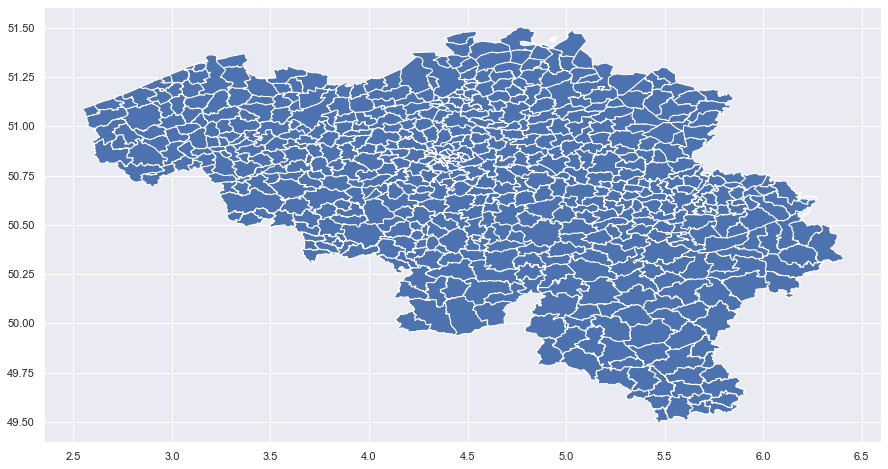

In [92]:
fig, ax = plt.subplots(1, figsize=(15,15))
map_arcgis_mun.plot(ax=ax)

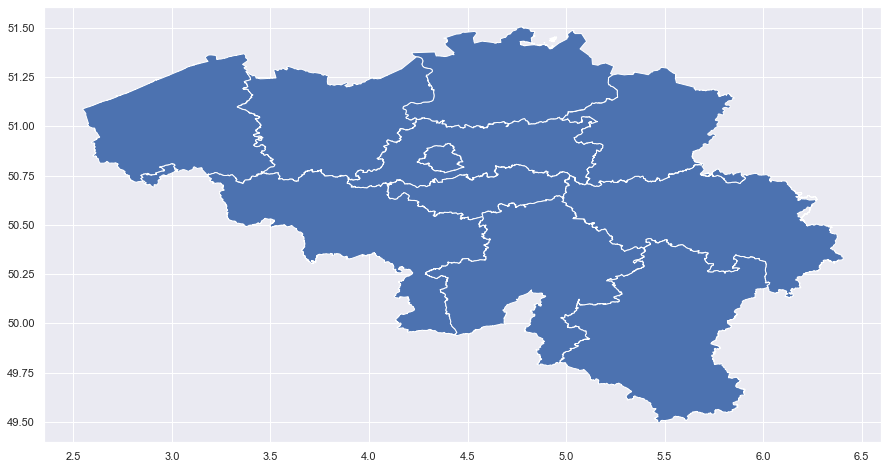

In [93]:
fig, ax = plt.subplots(1, figsize=(15,15))
map_arcgis_prov.plot(ax=ax)

In [94]:
df_accidents.head()

,hour,dow,CD_BUILD_UP_AREA,CD_COLL_TYPE,CD_LIGHT_COND,CD_ROAD_TYPE,CD_MUNTY_REFNIS,TX_MUNTY_DESCR_NL,CD_DSTR_REFNIS,TX_ADM_DSTR_DESCR_NL,CD_PROV_REFNIS,TX_PROV_DESCR_NL,CD_RGN_REFNIS,TX_RGN_DESCR_NL,MS_ACCT_WITH_DEAD,MS_ACCT_WITH_DEAD_30_DAYS,month,year,quarter
0,10,2,2.0,4.0,1.0,2.0,11001,Aartselaar,11000,Arrondissement Antwerpen,10000.0,Provincie Antwerpen,2000,Vlaams Gewest,0,0,1,2005,1
1,16,3,1.0,4.0,1.0,2.0,11001,Aartselaar,11000,Arrondissement Antwerpen,10000.0,Provincie Antwerpen,2000,Vlaams Gewest,0,0,1,2005,1
2,16,2,1.0,4.0,1.0,2.0,11001,Aartselaar,11000,Arrondissement Antwerpen,10000.0,Provincie Antwerpen,2000,Vlaams Gewest,0,0,1,2005,1
3,24,2,1.0,7.0,3.0,2.0,11001,Aartselaar,11000,Arrondissement Antwerpen,10000.0,Provincie Antwerpen,2000,Vlaams Gewest,0,0,1,2005,1
4,19,2,2.0,4.0,3.0,2.0,11001,Aartselaar,11000,Arrondissement Antwerpen,10000.0,Provincie Antwerpen,2000,Vlaams Gewest,0,0,1,2005,1


### 3.3 Now that we have the geoplot data per REFNIS, let's remove the alpha representation and only use numerical representation (which we will eventualy need to build the model)

In [95]:
df_accidents = df_accidents.drop('TX_MUNTY_DESCR_NL',axis=1)
df_accidents = df_accidents.drop('TX_ADM_DSTR_DESCR_NL',axis=1)
df_accidents = df_accidents.drop('TX_PROV_DESCR_NL',axis=1)

In [96]:
df_accidents.head()

,hour,dow,CD_BUILD_UP_AREA,CD_COLL_TYPE,CD_LIGHT_COND,CD_ROAD_TYPE,CD_MUNTY_REFNIS,CD_DSTR_REFNIS,CD_PROV_REFNIS,CD_RGN_REFNIS,TX_RGN_DESCR_NL,MS_ACCT_WITH_DEAD,MS_ACCT_WITH_DEAD_30_DAYS,month,year,quarter
0,10,2,2.0,4.0,1.0,2.0,11001,11000,10000.0,2000,Vlaams Gewest,0,0,1,2005,1
1,16,3,1.0,4.0,1.0,2.0,11001,11000,10000.0,2000,Vlaams Gewest,0,0,1,2005,1
2,16,2,1.0,4.0,1.0,2.0,11001,11000,10000.0,2000,Vlaams Gewest,0,0,1,2005,1
3,24,2,1.0,7.0,3.0,2.0,11001,11000,10000.0,2000,Vlaams Gewest,0,0,1,2005,1
4,19,2,2.0,4.0,3.0,2.0,11001,11000,10000.0,2000,Vlaams Gewest,0,0,1,2005,1


In [97]:
#df_accidents['CD_DSTR_REFNIS'].value_counts()

In [98]:
#df_accidents['TX_RGN_DESCR_NL'].value_counts()

In [99]:
#CD_RGN_REFNIS

# 2000    390033
# 3000    174394
# 4000     53545

#TX_RGN_DESCR_NL

# Vlaams Gewest                     390033
# Waals Gewest                      174394
# Brussels Hoofdstedelijk Gewest     53545

In [100]:
df_accidents = df_accidents.drop('TX_RGN_DESCR_NL',axis=1)

In [101]:
df_accidents.head()

,hour,dow,CD_BUILD_UP_AREA,CD_COLL_TYPE,CD_LIGHT_COND,CD_ROAD_TYPE,CD_MUNTY_REFNIS,CD_DSTR_REFNIS,CD_PROV_REFNIS,CD_RGN_REFNIS,MS_ACCT_WITH_DEAD,MS_ACCT_WITH_DEAD_30_DAYS,month,year,quarter
0,10,2,2.0,4.0,1.0,2.0,11001,11000,10000.0,2000,0,0,1,2005,1
1,16,3,1.0,4.0,1.0,2.0,11001,11000,10000.0,2000,0,0,1,2005,1
2,16,2,1.0,4.0,1.0,2.0,11001,11000,10000.0,2000,0,0,1,2005,1
3,24,2,1.0,7.0,3.0,2.0,11001,11000,10000.0,2000,0,0,1,2005,1
4,19,2,2.0,4.0,3.0,2.0,11001,11000,10000.0,2000,0,0,1,2005,1


### 3.4 Rename columns (this part will be moved to 2.)

In [102]:
#rename the column names

#CD_BUILD_UP_AREA = where

#1.0 = Binnen bebouwde kom (in residential area)
#2.0 = Buiten bebouwde kom (outside built-up areas)
#3.0 = Niet beschikbaar (not available)

#CD_COLL_TYPE = how

#CD_ROAD_TYPE = roadtype

# Gewestweg, provincieweg of gemeenteweg    562714
# Autosnelweg                                49269
# Onbekend                                    5989

df_accidents = df_accidents.rename(index=str, columns={'CD_BUILD_UP_AREA':'where',
                                                      'CD_COLL_TYPE':'how',
                                                      'CD_ROAD_TYPE':'typeofroad',
                                                      'CD_MUNTY_REFNIS':'refnismun',
                                                      'CD_DSTR_REFNIS':'refnisdist',
                                                      'CD_PROV_REFNIS':'refnisprov',
                                                      'CD_RGN_REFNIS':'refnisgew',
                                                      'CD_LIGHT_COND':'illumination',
                                                      'MS_ACCT_WITH_DEAD':'dead',
                                                      'MS_ACCT_WITH_DEAD_30_DAYS':'deadafter30d'})

In [103]:
df_accidents.head()

,hour,dow,where,how,illumination,typeofroad,refnismun,refnisdist,refnisprov,refnisgew,dead,deadafter30d,month,year,quarter
0,10,2,2.0,4.0,1.0,2.0,11001,11000,10000.0,2000,0,0,1,2005,1
1,16,3,1.0,4.0,1.0,2.0,11001,11000,10000.0,2000,0,0,1,2005,1
2,16,2,1.0,4.0,1.0,2.0,11001,11000,10000.0,2000,0,0,1,2005,1
3,24,2,1.0,7.0,3.0,2.0,11001,11000,10000.0,2000,0,0,1,2005,1
4,19,2,2.0,4.0,3.0,2.0,11001,11000,10000.0,2000,0,0,1,2005,1


### 3.5 build geoplot with sum of deaths per municipality

In [104]:
df_reduced = df_accidents[['refnismun','dead']]
df_reduced = df_reduced.groupby(['refnismun']).sum()

In [105]:
df_reduced.head(10)

,dead
refnismun,
11001,11
11002,199
11004,6
11005,3
11007,3
11008,17
11009,35
11013,5
11016,14


In [106]:
df_reduced.reset_index(level=0, inplace=True)

In [107]:
df_reduced.head(10)

,refnismun,dead
0,11001,11
1,11002,199
2,11004,6
3,11005,3
4,11007,3
5,11008,17
6,11009,35
7,11013,5
8,11016,14
9,11018,4


In [108]:
df_reduced.nunique()

refnismun    589
dead          60
dtype: int64

In [109]:
map_arcgis_mun.head()

,OBJECTID,ADMUNAFR,ADMUNADU,ADMUNAGE,Communes,CODE_INS,arrond,geometry
0,1,AARTSELAAR,AARTSELAAR,AARTSELAAR,Aartselaar,11001,11,"POLYGON ((4.40125 51.14814, 4.40114 51.14797, ..."
1,2,ANVERS,ANTWERPEN,ANTWERPEN,Antwerpen,11002,11,"POLYGON ((4.34109 51.35766, 4.34112 51.35760, ..."
2,3,BOECHOUT,BOECHOUT,BOECHOUT,Boechout,11004,11,"POLYGON ((4.52882 51.19051, 4.52971 51.19020, ..."
3,4,BOOM,BOOM,BOOM,Boom,11005,11,"POLYGON ((4.36411 51.10597, 4.36456 51.10596, ..."
4,5,BORSBEEK,BORSBEEK,BORSBEEK,Borsbeek,11007,11,"POLYGON ((4.48350 51.20315, 4.48354 51.20314, ..."


In [110]:
map_arcgis_mun = map_arcgis_mun.drop(['OBJECTID','ADMUNAFR','ADMUNADU','ADMUNAGE','Communes','arrond'],axis=1)

In [111]:
map_arcgis_mun.head(5)

,CODE_INS,geometry
0,11001,"POLYGON ((4.40125 51.14814, 4.40114 51.14797, ..."
1,11002,"POLYGON ((4.34109 51.35766, 4.34112 51.35760, ..."
2,11004,"POLYGON ((4.52882 51.19051, 4.52971 51.19020, ..."
3,11005,"POLYGON ((4.36411 51.10597, 4.36456 51.10596, ..."
4,11007,"POLYGON ((4.48350 51.20315, 4.48354 51.20314, ..."


In [112]:
type(map_arcgis_mun['CODE_INS'].iloc[0])

str

In [113]:
map_arcgis_mun['CODE_INS']=map_arcgis_mun['CODE_INS'].astype(int)

In [114]:
map_arcgis_mun.nunique()

CODE_INS    589
geometry    589
dtype: int64

In [115]:
df_reduced.head(5)

,refnismun,dead
0,11001,11
1,11002,199
2,11004,6
3,11005,3
4,11007,3


In [116]:
df_reduced = df_reduced.rename(columns={'refnismun':'CODE_INS'})

In [117]:
df_reduced.head(5)

,CODE_INS,dead
0,11001,11
1,11002,199
2,11004,6
3,11005,3
4,11007,3


In [118]:
type(df_reduced['CODE_INS'].iloc[0])

numpy.int64

In [119]:
# join the geodataframe with the cleaned up csv dataframe
# merged = map_arcgis_mun.set_index('CODE_INS').join(df_reduced.set_index('CODE_INS'))
merged = pd.merge(map_arcgis_mun, df_reduced, on='CODE_INS')
merged.head()

,CODE_INS,geometry,dead
0,11001,"POLYGON ((4.40125 51.14814, 4.40114 51.14797, ...",11
1,11002,"POLYGON ((4.34109 51.35766, 4.34112 51.35760, ...",199
2,11004,"POLYGON ((4.52882 51.19051, 4.52971 51.19020, ...",6
3,11005,"POLYGON ((4.36411 51.10597, 4.36456 51.10596, ...",3
4,11007,"POLYGON ((4.48350 51.20315, 4.48354 51.20314, ...",3


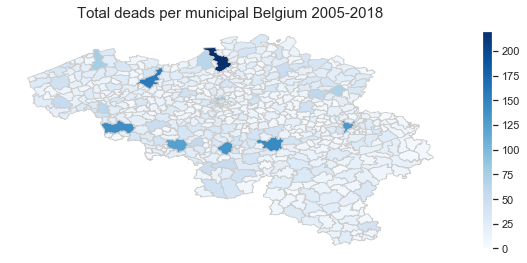

In [125]:
# set a variable that will call whatever column we want to visualise on the map
variable = 'dead'

# set the range for the choropleth
vmin, vmax = 0, 220

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1,figsize=(10, 10)) #,figsize=(15, 15)

# create map
merged.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8',figsize=(10,10))

# Now we can customise and add annotations

# remove the axis
ax.axis('off')

# add a title
ax.set_title('Total deads per municipal Belgium 2005-2018', \
              fontdict={'fontsize': '15',
                        'fontweight' : '1'})

# # create an annotation for the  data source
# #ax.annotate('',
#            xy=(0.5, .3), xycoords='figure fraction',
#            horizontalalignment='left', verticalalignment='top',
#            fontsize=12, color='#555555')

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm,shrink=0.4)


os.chdir('D:\\GitHub\\Road_accidents_Belgium\\Plots')

# this will save the figure as a high-res png. you can also save as svg
fig.savefig('BE_mun.png', dpi=300)

### 3.6 build geoplot-GIF sum of deaths per year, per municipality

In [126]:
import gif #https://pypi.org/project/gif/

In [127]:
os.getcwd()

'D:\\GitHub\\Road_accidents_Belgium\\Plots'

In [128]:
os.chdir('D:\\GitHub\\Road_accidents_Belgium\\Plots\\gif')

In [129]:
os.getcwd()

'D:\\GitHub\\Road_accidents_Belgium\\Plots\\gif'

In [130]:
df_gif = df_accidents[['refnismun','dead','year']]
df_gif = pd.DataFrame(df_gif.groupby(['year','refnismun'])['dead'].sum()).reset_index()

In [131]:
df_gif.columns=['year','CODE_INS','dead']

In [132]:
df_gif.head()

,year,CODE_INS,dead
0,2005,11001,0
1,2005,11002,14
2,2005,11004,0
3,2005,11005,1
4,2005,11007,2


In [133]:
type(df_gif['CODE_INS'].iloc[0])

numpy.int64

In [134]:
map_arcgis_mun.head()

,CODE_INS,geometry
0,11001,"POLYGON ((4.40125 51.14814, 4.40114 51.14797, ..."
1,11002,"POLYGON ((4.34109 51.35766, 4.34112 51.35760, ..."
2,11004,"POLYGON ((4.52882 51.19051, 4.52971 51.19020, ..."
3,11005,"POLYGON ((4.36411 51.10597, 4.36456 51.10596, ..."
4,11007,"POLYGON ((4.48350 51.20315, 4.48354 51.20314, ..."


In [135]:
map_arcgis_mun.shape

(589, 2)

In [136]:
type(map_arcgis_mun['CODE_INS'].iloc[0])

numpy.int32

In [137]:
merged_for_gif = pd.merge(map_arcgis_mun, df_gif, on='CODE_INS')

In [138]:
merged_for_gif

,CODE_INS,geometry,year,dead
0,11001,"POLYGON ((4.40125 51.14814, 4.40114 51.14797, ...",2005,0
1,11001,"POLYGON ((4.40125 51.14814, 4.40114 51.14797, ...",2006,0
2,11001,"POLYGON ((4.40125 51.14814, 4.40114 51.14797, ...",2007,3
3,11001,"POLYGON ((4.40125 51.14814, 4.40114 51.14797, ...",2008,0
4,11001,"POLYGON ((4.40125 51.14814, 4.40114 51.14797, ...",2009,1
...,...,...,...,...
8223,93090,"POLYGON ((4.68190 50.11200, 4.68248 50.11173, ...",2014,0
8224,93090,"POLYGON ((4.68190 50.11200, 4.68248 50.11173, ...",2015,0
8225,93090,"POLYGON ((4.68190 50.11200, 4.68248 50.11173, ...",2016,1
8226,93090,"POLYGON ((4.68190 50.11200, 4.68248 50.11173, ...",2017,1


In [139]:
merged_for_gif[merged_for_gif['year']==2005]

,CODE_INS,geometry,year,dead
0,11001,"POLYGON ((4.40125 51.14814, 4.40114 51.14797, ...",2005,0
14,11002,"POLYGON ((4.34109 51.35766, 4.34112 51.35760, ...",2005,14
28,11004,"POLYGON ((4.52882 51.19051, 4.52971 51.19020, ...",2005,0
42,11005,"POLYGON ((4.36411 51.10597, 4.36456 51.10596, ...",2005,1
56,11007,"POLYGON ((4.48350 51.20315, 4.48354 51.20314, ...",2005,2
...,...,...,...,...
8158,93018,"POLYGON ((4.73690 50.20989, 4.73691 50.20988, ...",2005,1
8172,93022,"POLYGON ((4.57018 50.32252, 4.57102 50.32235, ...",2005,2
8186,93056,"POLYGON ((4.53842 50.22916, 4.53846 50.22836, ...",2005,7
8200,93088,"POLYGON ((4.50451 50.32896, 4.50458 50.32889, ...",2005,1


In [140]:
# #Decorate a Matplotlib plot function with gif.frame:

@gif.frame
def plot_year(year):
    variable = 'dead'
    vmin, vmax = 0, 220
    fig, ax = plt.subplots(1,dpi=100,figsize=(20, 15)) #,
    merged_for_gif[merged_for_gif['year']==year].plot(column=variable,cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')#,figsize=(30,30)
    ax.axis('off')
    ax.set_title('Death by road accident per Belgian municipalities in '+str(year),fontdict={'fontsize': '10','fontweight' : '1'})
#     ax.annotate('data source: https://statbel.fgov.be/en/open-data',
#            xy=(0.5, .08), xycoords='figure fraction',
#            horizontalalignment='left', verticalalignment='top',
#            fontsize=8, color='#555555')
    sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
    sm._A = []
    cbar = fig.colorbar(sm)


In [141]:
# #Decorate a Matplotlib plot function with gif.frame:

# @gif.frame
# def plot_year(year):
#     variable = 'dead'
#     merged_for_gif[merged_for_gif['year']==year].plot(column=variable,cmap='Blues', linewidth=0.8, edgecolor='0.8')
#     plt.title('Total deads per municipal Belgium '+str(year))
#     plt.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax)
   

In [142]:
yearyear = np.linspace(2005, 2018, num=14)
yearyear=yearyear.astype(int)

In [143]:
yearyear

array([2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018])

In [ ]:
#Build a bunch of "frames" with a standard for loop:
frames = []
for _ in yearyear:
    frame = plot_year(_)
    frames.append(frame)
    
#Select the duration (milliseconds) between each frame and save
gif.save(frames, "accidents_over_time.gif", duration=3000)

In [ ]:
os.getcwd()

In [ ]:
from IPython.display import Image

In [ ]:
with open('D:\\GitHub\\Road_accidents_Belgium\\Plots\\gif\\accidents_over_time.gif','rb') as f:
    display(Image(data=f.read(), format='png'))

In [ ]:
df_reduced.head()

In [ ]:
df_accidents[df_accidents['dead']==1]['refnismun'].value_counts(ascending=False).head(5)

In [ ]:
print(df_accidents[df_accidents['dead']==1]['refnismun'].value_counts().mean())
print(df_accidents[df_accidents['dead']==1]['refnismun'].value_counts().max())
print(df_accidents[df_accidents['dead']==1]['refnismun'].value_counts().min())

### 3.7 Explore municipalities names based on refnismun

In [ ]:
findmun = "D:\\GitHub\\Road_accidents_Belgium\\Geoplot\\Arcgis\\municipalities\\bemun.shp"
mapped_mun = gpd.read_file(findmun)

In [ ]:
mapped_mun = mapped_mun.drop(['OBJECTID','ADMUNAFR','ADMUNADU','ADMUNAGE','arrond','geometry'],axis=1)

In [ ]:
type(mapped_mun['CODE_INS'].iloc[0])

In [ ]:
mapped_mun['CODE_INS']=mapped_mun['CODE_INS'].astype(int)

In [ ]:
mun_name = pd.merge(df_reduced, mapped_mun, on='CODE_INS')

In [ ]:
mun_name

In [ ]:
mun_name.sort_values([('dead')],ascending=False)[:10] 

-These 10 municipalities have the most deaths<br>
-But how many of the deaths are people traveling for work, were locals, etc... To be investigated :)<br>

In [ ]:
df_accidents.head()

### 3.8 Some more EDA

In [ ]:
os.getcwd()

In [ ]:
os.chdir('D:\\GitHub\\Road_accidents_Belgium\\Plots\\')

In [ ]:
plt.figure(figsize=(12,6))
sns_plot = sns.countplot(df_accidents['year'])
fig = sns_plot.get_figure()
#fig.savefig('recorded_accidents_per_year.png', dpi=300)

In [ ]:
plt.figure(figsize=(12,6))
sns_plot = sns.countplot(df_accidents['quarter'])
fig = sns_plot.get_figure()
#fig.savefig('recorded_accidents_per_quarter.png', dpi=100)

In [ ]:
plt.figure(figsize=(12,6))
sns_plot = sns.countplot(df_accidents['dow'])
fig = sns_plot.get_figure()
#fig.savefig('recorded_accidents_per_dayow.png', dpi=100)

In [ ]:
plt.figure(figsize=(12,6))
sns_plot = sns.countplot(df_accidents['hour'])
fig = sns_plot.get_figure()
#fig.savefig('recorded_accidents_per_hr.png', dpi=100)

In [ ]:
plt.figure(figsize=(12,6))
sns_plot = sns.countplot(df_accidents['month'])
fig = sns_plot.get_figure()
#fig.savefig('recorded_accidents_per_month.png', dpi=100)

In [ ]:
print(df_accidents['dead'].value_counts())
print(df_accidents['deadafter30d'].value_counts())

In [ ]:
df_accidents.groupby('year').agg({'dead': [np.mean],
                                  'deadafter30d': [np.mean],
                                  })

In [ ]:
# dead =                Number of accidents with death
# deadafter30d =        Number of accidents with death in 30 days

In [ ]:
fig, axs = plt.subplots(2)

fig.set_figheight(10)
fig.set_figwidth(10)

fig.suptitle('casualties over the years',x=0.5,y=0.92)

axs[0].plot(df_accidents.groupby('year').agg({'dead': [np.mean]}))
axs[0].set_title('death')
axs[1].plot(df_accidents.groupby('year').agg({'deadafter30d': [np.mean]}))
axs[1].set_title('death after 30 days')


for ax in axs.flat:
    ax.set(xlabel='year', ylabel='mean')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    
# #same y scale
# for ax in axs.flat:
#     ax.set_ylim([0,0.1])

#fig.savefig('mean_accidents_mort_inj_over_time.png', dpi=100)

In [ ]:
df_accidents.head()

In [ ]:
df_accidents.to_csv(r'D:\\GitHub\\Road_accidents_Belgium\\numeric_accidents_data.csv', index = False)

In [ ]:
print('total dead : '+ str(len(df_accidents[df_accidents['dead']==1])))
print('total deadafter30d : '+ str(len(df_accidents[df_accidents['deadafter30d']==1])))

In [ ]:
df_accidents.shape

In [ ]:
print('% dead : '+ str(len(df_accidents[df_accidents['dead']==1])/617972*100)+'%')
print('% deadafter30d : '+ str(len(df_accidents[df_accidents['deadafter30d']==1])/617972*100)+'%')